## Imports

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import json


# Models List
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Pre-Processing
from sklearn.preprocessing import LabelEncoder
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
# 
from sklearn.model_selection import train_test_split

In [2]:
# Constants
RANDOM_SEED = 42

## Loading Data
Let's load the data

In [3]:
df = pd.read_csv("../Data/experiment_with_lat_and_lng.csv") 
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS,lat,lng
7,4,RIDGEWOOD,02 TWO FAMILY DWELLINGS,1,3493,52,B1,62-76 60TH PLACE,11385.0,2.0,...,2160.0,1901.0,1,B1,1145000,2019-10-25,queens,62-76 60TH PLACE NYC,40.711533,-73.903460
31,3,MIDWOOD,03 THREE FAMILY DWELLINGS,1,6715,21,C0,1038 EAST 14TH STREET,11230.0,3.0,...,3089.0,1910.0,1,C0,725000,2019-12-12,brooklyn,1038 EAST 14TH STREET NYC,40.624109,-73.962364
80,2,WAKEFIELD,02 TWO FAMILY DWELLINGS,1,5058,64,B1,4333 WILDER AVENUE,10466.0,2.0,...,1574.0,1945.0,1,B1,490000,2019-09-27,bronx,4333 WILDER AVENUE NYC,40.897981,-73.843953
34,4,MIDDLE VILLAGE,01 ONE FAMILY DWELLINGS,1,3033,5,A2,73-24 PENELOPE AVENUE,11379.0,1.0,...,1304.0,1950.0,1,A2,950000,2019-06-19,queens,73-24 PENELOPE AVENUE NYC,40.716044,-73.881376
55,3,OCEAN HILL,02 TWO FAMILY DWELLINGS,1,1506,51,B9,535 BAINBRIDGE STREET,11233.0,2.0,...,2700.0,1910.0,1,B9,820000,2019-04-30,brooklyn,535 BAINBRIDGE STREET NYC,40.682959,-73.915594


## Pre-Processing - DELETE THIS !!!!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     object 
 2   BUILDING CLASS CATEGORY                98 non-null     object 
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     object 
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     object 
 7   ADDRESS                                98 non-null     object 
 8   ZIP CODE                               98 non-null     float64
 9   RESIDENTIAL UNITS                      98 non-null     float64
 10  COMMERCIAL UNITS                       98 non-null     float64
 11  TOTAL UN

In [5]:
LABELS_TO_DROP = ["ADDRESS", "FINAL_ADDRESS", "AREA"]

df.drop(labels=LABELS_TO_DROP, axis="columns", inplace=True)
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,lat,lng
57,3,BUSHWICK,03 THREE FAMILY DWELLINGS,1,3380,47,C0,11221.0,3.0,0.0,3.0,2000.0,3000.0,1915.0,1,C0,1300000,2019-11-12,40.687943,-73.916813
50,5,DONGAN HILLS,01 ONE FAMILY DWELLINGS,1,3334,28,A2,10305.0,1.0,0.0,1.0,4500.0,1242.0,1965.0,1,A2,700000,2019-04-24,40.590243,-74.091798
48,5,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,28,31,B2,10301.0,2.0,0.0,2.0,3552.0,2500.0,1901.0,1,B2,626288,2019-05-16,40.642229,-74.083044
26,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,231,12,A1,10310.0,1.0,0.0,1.0,2800.0,1182.0,1935.0,1,A1,575000,2019-09-19,40.627803,-74.125063
88,3,MANHATTAN BEACH,02 TWO FAMILY DWELLINGS,1,8754,60,B3,11235.0,2.0,0.0,2.0,2500.0,2160.0,1940.0,1,B3,735000,2019-05-31,40.578754,-73.941137


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     object 
 2   BUILDING CLASS CATEGORY                98 non-null     object 
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     object 
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     object 
 7   ZIP CODE                               98 non-null     float64
 8   RESIDENTIAL UNITS                      98 non-null     float64
 9   COMMERCIAL UNITS                       98 non-null     float64
 10  TOTAL UNITS                            98 non-null     float64
 11  LAND SQU

In [7]:
for object_type_data in df.select_dtypes(include='object'):
    lb=LabelEncoder()
    df[object_type_data]=lb.fit_transform(df[object_type_data].values)
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,lat,lng
61,4,51,0,0,3162,36,3,11375.0,1.0,0.0,1.0,1764.0,1440.0,1945.0,1,3,773000,3,40.720139,-73.855827
62,2,46,2,0,4022,7,9,10460.0,3.0,0.0,3.0,2375.0,2580.0,1901.0,1,9,650000,7,40.841315,-73.869418
58,3,21,0,0,7841,5,4,11234.0,1.0,0.0,1.0,2000.0,1420.0,1920.0,1,4,655000,66,40.621191,-73.933392
88,3,35,1,0,8754,60,7,11235.0,2.0,0.0,2.0,2500.0,2160.0,1940.0,1,7,735000,30,40.578754,-73.941137
71,3,12,2,0,3672,5,9,11207.0,3.0,0.0,3.0,3021.0,3264.0,2007.0,1,9,800000,21,40.676695,-73.894810


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     int32  
 2   BUILDING CLASS CATEGORY                98 non-null     int32  
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     int32  
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     int32  
 7   ZIP CODE                               98 non-null     float64
 8   RESIDENTIAL UNITS                      98 non-null     float64
 9   COMMERCIAL UNITS                       98 non-null     float64
 10  TOTAL UNITS                            98 non-null     float64
 11  LAND SQU

In [9]:
cat_columns = df.select_dtypes(include=['int64','int32']).columns
print(cat_columns)
for curr_column in cat_columns:
    print("{} column distribution:".format(curr_column))
    print(df[curr_column].value_counts())
    print()

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')
BOROUGH column distribution:
4    35
3    33
5    17
2    13
Name: BOROUGH, dtype: int64

NEIGHBORHOOD column distribution:
19    4
14    3
4     3
48    3
9     3
     ..
66    1
32    1
31    1
30    1
0     1
Name: NEIGHBORHOOD, Length: 68, dtype: int64

BUILDING CLASS CATEGORY column distribution:
0    49
1    38
2     9
4     1
3     1
Name: BUILDING CLASS CATEGORY, dtype: int64

TAX CLASS AS OF FINAL ROLL 18/19 column distribution:
0    96
1     2
Name: TAX CLASS AS OF FINAL ROLL 18/19, dtype: int64

BLOCK column distribution:
12064    2
8304     1
3493     1
9000     1
3369     1
        ..
3291     1
1116     1
4957     1
4958     1
12548    1
Name: BLOCK, Length: 97, dtype: int64

LOT column di

## Models

In [10]:
# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)

train_y = train_df['SALE PRICE']
# train_log_y = np.log(train_y)
train_x = train_df.drop(['SALE PRICE'], axis=1)

test_y = test_df['SALE PRICE']
# test_log_y = np.log(test_y)
test_x = test_df.drop(['SALE PRICE'], axis=1)

## Plotting functions defenitions

In [11]:
def plot_predicted_vs_real(predicted_y, real_y,title="Predicted vs. Real Sale Price"):
    """
    predicted_y: The predicted target Series as gained from model.predict()
    real_y: The actual target Series
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(real_y, predicted_y)
    x , y = list(range(min(real_y), max(real_y))), list(range(min(real_y), max(real_y)))
    plt.scatter(x,y)
    std = real_y.std()
    plt.fill_between(x, y + std, y - std, facecolor='r', alpha=0.1)
    plt.title(title)
    plt.xlabel("Real Price")
    plt.ylabel("Predicted Price")
    plt.show()

In [12]:
def plot_vs_map(test_x, predicted_y, real_y, path_to_map="../Images/nyc_map1.png", border_box=[-74.212974, -73.73724190000001, 40.520321200000005, 40.8979809], title='Plotting Spatial Data on New-York map'):
    """
    """
    # Get the points whos error is less then the mse
    std = real_y.std()
    mean = real_y.std()
    less_then_std = test_x[(predicted_y > real_y - std) & (predicted_y < real_y + std)]
    more_then_std = test_x[~((predicted_y > real_y -std) & (predicted_y < real_y + std))]
    # Plot the map
    ruh_m = plt.imread(path_to_map)
    fig, ax = plt.subplots(figsize = (8,7))
    # Print good points
    ax.scatter(less_then_std.lng, less_then_std.lat, zorder=1, alpha= 0.4, c='b', s=30)
    # Print Bad points
    ax.scatter(more_then_std.lng, more_then_std.lat, zorder=1, alpha= 0.4, c='r', s=30)

    ax.set_title(title)
    ax.set_xlim(border_box[0],border_box[1])
    ax.set_ylim(border_box[2],border_box[3])
    ax.imshow(ruh_m, zorder=0, extent = border_box, aspect= 'equal')

## Evaluation Function

In [13]:
def model_evaluation(model, model_name):
    model.fit(train_x, train_y)
    test_predicted_y = model.predict(test_x)
    print(f"{model_name} MSE:{mean_squared_error(test_y, test_predicted_y):,}")
    print(f"{model_name} R2 score:{r2_score(test_y, test_predicted_y):,}")
    plot_predicted_vs_real(test_predicted_y, test_y, title=f"{model_name} Predicted vs Real")
    with open("../Images/nyc_map1.json") as file:
        border_box = json.load(file)
    plot_vs_map(test_x, test_predicted_y, test_y, path_to_map="../Images/nyc_map1.png", border_box=border_box, title=f"{model_name} errors on map")


## Dummy Regression - Mean

Dummy Mean Regresson MSE:189,957,834,230.91718
Dummy Mean Regresson R2 score:-0.005942863376866114


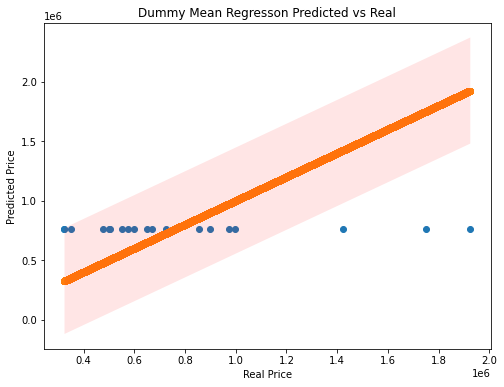

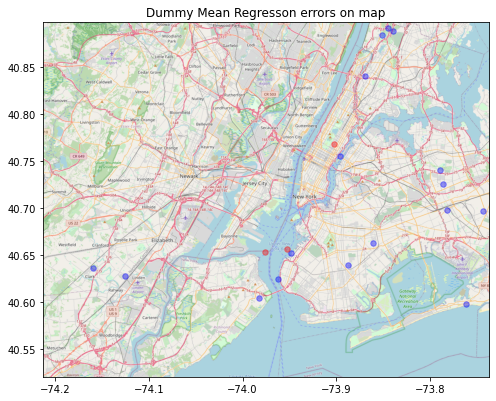

In [15]:
dummy_mean_regression = DummyRegressor(strategy="mean")
model_evaluation(dummy_mean_regression, "Dummy Mean Regresson")

## Dummy Median Regression

Dummy Median Regresson MSE:194,718,500,000.0
Dummy Median Regresson R2 score:-0.031153499067257506


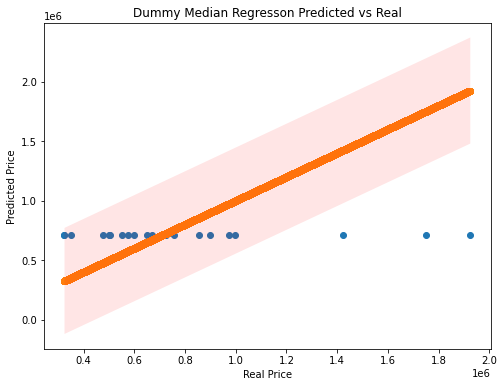

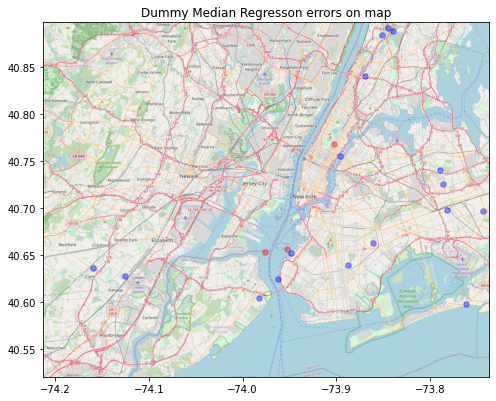

In [16]:
dummy_median_regression = DummyRegressor(strategy="median")
model_evaluation(dummy_median_regression, "Dummy Median Regresson")

## Linear Regression

Linear Regression MSE:110,818,520,186.41524
Linear Regression R2 score:0.4131481864759765


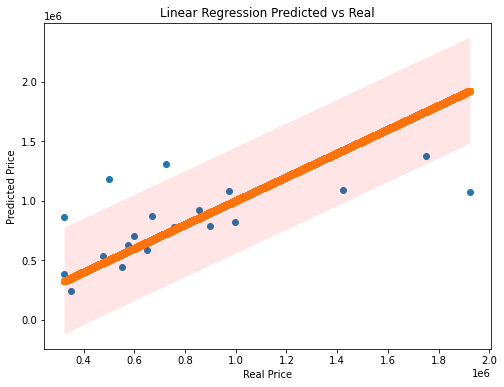

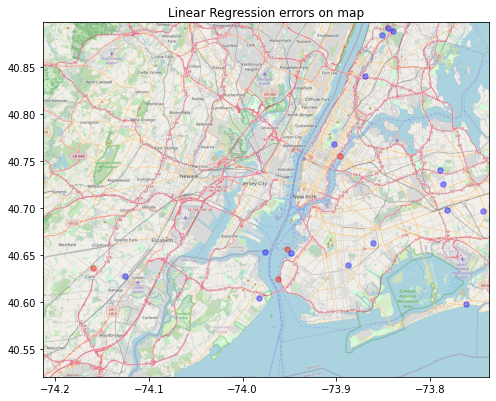

In [17]:
linear_regression = LinearRegression(n_jobs=len(df))
model_evaluation(linear_regression, "Linear Regression")

## Random Forest Regressor

Random Forest Regression MSE:122,514,750,705.95332
Random Forest Regression R2 score:0.35120949535972945


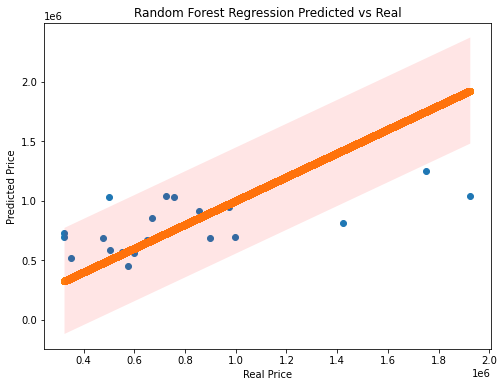

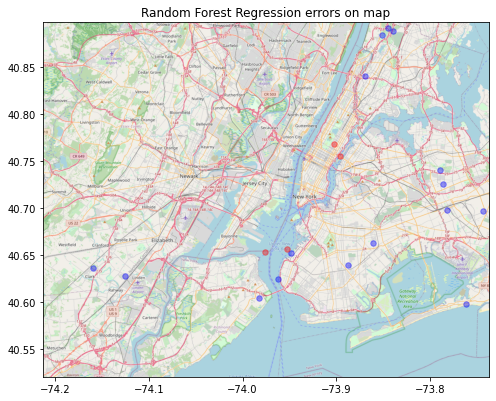

In [18]:
#Random Forest constants
N_ESTIMATORS = 100
random_forest_regression = RandomForestRegressor(n_estimators=N_ESTIMATORS, criterion="mse", n_jobs=N_ESTIMATORS, random_state=RANDOM_SEED)
model_evaluation(random_forest_regression, "Random Forest Regression")

## Multi Layered Perceptron Regressor

MLPR MSE:143,364,026,133.88397
MLPR R2 score:0.24079983572015917


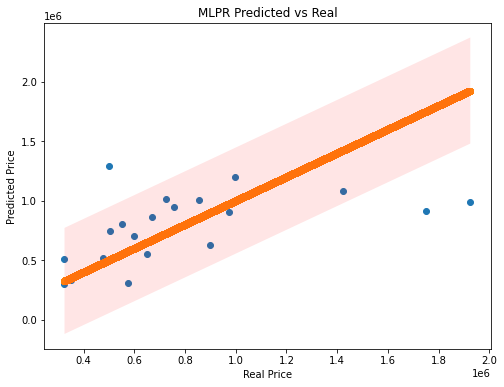

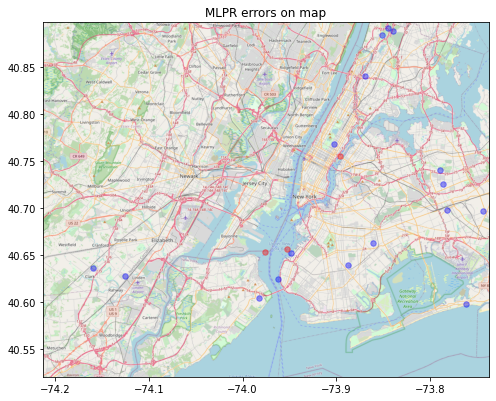

In [19]:
# MLP constants
HIDDEN_LAYER_SIZES = (512, 512, 512, 512, 512)
ACTIVATION_FUNCTION = "relu"
MAX_ITERATIONS = int(1e4)
mlp_regression = MLPRegressor(hidden_layer_sizes=HIDDEN_LAYER_SIZES, activation=ACTIVATION_FUNCTION, max_iter=MAX_ITERATIONS, random_state=RANDOM_SEED)
model_evaluation(mlp_regression, "MLPR")